In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [3]:
# loading boston housing datasets from tensorflow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

# Exploring Our Dataset

In [5]:
df = pd.DataFrame(X_train)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,404.0,3.745111,9.240734,0.00632,0.081437,0.26888,3.674808,88.9762
1,404.0,11.480198,23.767711,0.00000,0.000000,0.00000,12.500000,100.0000
2,404.0,11.104431,6.811308,0.46000,5.130000,9.69000,18.100000,27.7400
3,404.0,0.061881,0.241238,0.00000,0.000000,0.00000,0.000000,1.0000
4,404.0,0.557356,0.117293,0.38500,0.453000,0.53800,0.631000,0.8710
5,404.0,6.267082,0.709788,3.56100,5.874750,6.19850,6.609000,8.7250
6,404.0,69.010644,27.940665,2.90000,45.475000,78.50000,94.100000,100.0000
7,404.0,3.740271,2.030215,1.12960,2.077100,3.14230,5.118000,10.7103
8,404.0,9.440594,8.698360,1.00000,4.000000,5.00000,24.000000,24.0000
9,404.0,405.898515,166.374543,188.00000,279.000000,330.00000,666.000000,711.0000


In [11]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [12]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [32]:
np.mean(y_train), np.min(y_train), np.max(y_train) 

(22.395049504950492, 5.0, 50.0)

In [33]:
np.mean(y_test), np.min(y_test), np.max(y_test) 

(23.07843137254902, 5.6, 50.0)

## Preprocess our data

In [13]:
# Creating a normalization layers
norm = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(13,)) # 13 columns
norm.adapt(X_train)

In [14]:
def compile_model(model):
    model.compile(
        loss='mae',
        optimizer='adam',
#         metrics=['mae'], # commented out, as our loss & metrics is same
    )
    model.summary()

In [34]:
def fit_and_evaluate(model, epochs=100):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.15)
    print('MAE in Train set :', model.evaluate(X_train, y_train))
    print('MAE in Test set :', model.evaluate(X_test, y_test))    
    pd.DataFrame(history.history).plot()
    plt.xlabel('Epoch')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 13)                27        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 14        
Total params: 41
Trainable params: 14
Non-trainable params: 27
_________________________________________________________________
13/13 [==============================] - 0s 1ms/step - loss: 11.4547
MAE in Train set : 11.454733848571777
4/4 [==============================] - 0s 1ms/step - loss: 12.6087
MAE in Test set : 12.608678817749023


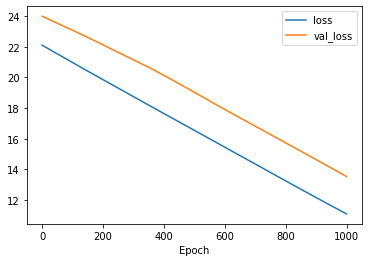

In [36]:
model_1 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(1, input_shape=(13,)),
])
compile_model(model_1)
fit_and_evaluate(model_1, epochs=1000)

After 1000 epochs it's loss is still decreasing,, We need to make a bigger model

## Let's improve our model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 13)                27        
_________________________________________________________________
dense_10 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 3,036
Trainable params: 3,009
Non-trainable params: 27
_________________________________________________________________
13/13 [==============================] - 0s 2ms/step - loss: 1.8317
MAE in Train set : 1.8317309617996216
4/4 [==============================] - 0s 1ms/step - loss: 2.7017
MAE in Test set : 2.7016727924346924


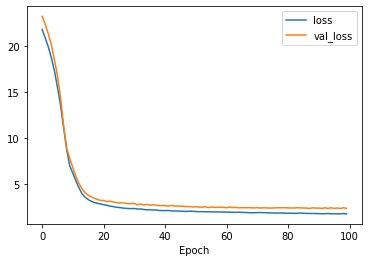

In [37]:
model_2 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(64, input_shape=(13,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation=None),
])
compile_model(model_2)
fit_and_evaluate(model_2, epochs=100)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 13)                27        
_________________________________________________________________
dense_16 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 21,728
Trainable params: 21,701
Non-trainable params: 27
_________________________________________________________________
13/13 [==============================] - 0s 2ms/step - loss: 1.2794
MAE in Train set : 1.2793514728546143
4/4 [===

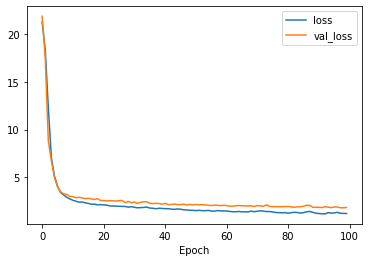

In [39]:
# Trying to make it more complex
model_3 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(100, input_shape=(13,), activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation=None),
])
compile_model(model_3)
fit_and_evaluate(model_3, epochs=100)

**Well, it's not improving much, So, model_2 is our best model**

In [42]:
y_pred = model_2.predict(X_test)
y_pred[:5]

array([[ 7.8306174],
       [18.24075  ],
       [20.257042 ],
       [26.827372 ],
       [24.207518 ]], dtype=float32)

In [43]:
y_test[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

## Saving our model

In [46]:
model_2.save('saved/boston_housing') # saving as SavedModel

INFO:tensorflow:Assets written to: saved/boston_housing\assets


In [47]:
# The '.h5' extension indicates that the model saved to HDF5.
model_2.save('saved/boston_housing.h5') # saving as HDF5 format

## Reloading Our Model

In [49]:
model = tf.keras.models.load_model('saved/boston_housing')
model.predict(X_test[[50]]), y_test[50]

(array([[34.141953]], dtype=float32), 35.4)

In [50]:
model = tf.keras.models.load_model('saved/boston_housing.h5')
model.predict(X_test[[50]]), y_test[50]

(array([[34.141953]], dtype=float32), 35.4)